## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [7]:
# PART 1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

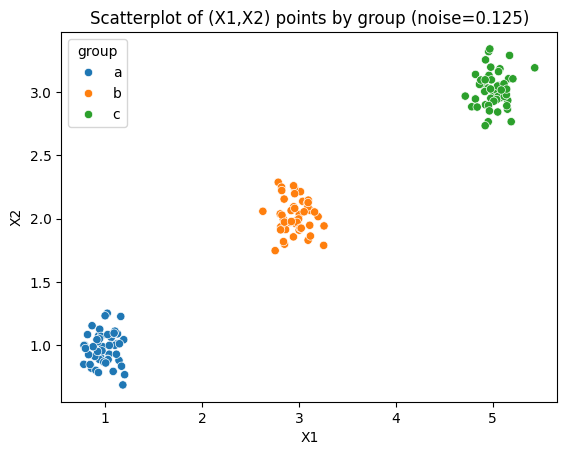

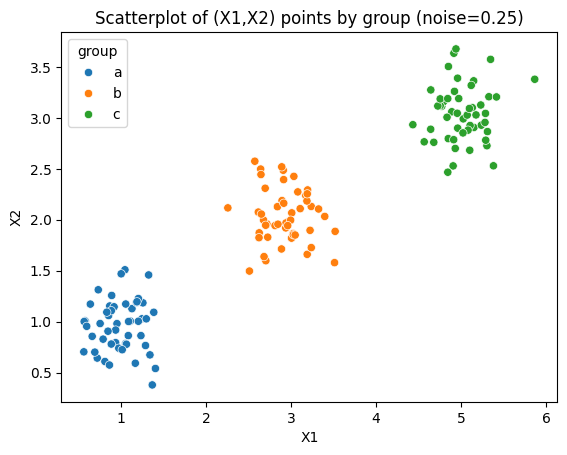

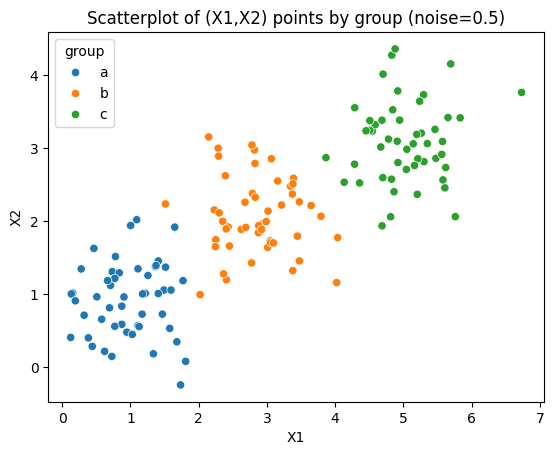

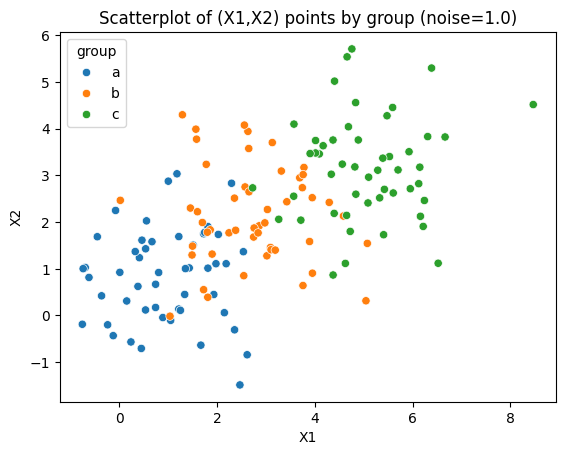

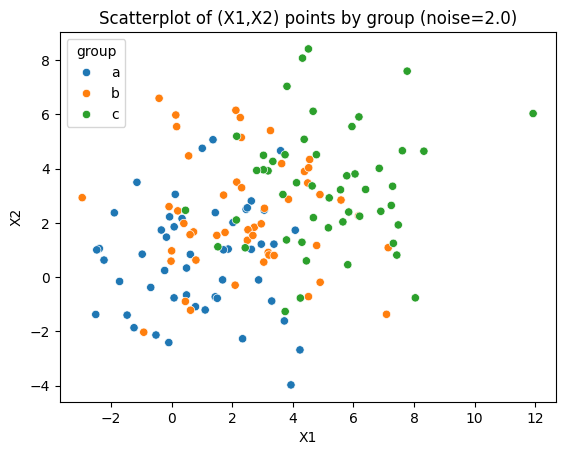

In [8]:
# PART 2
import matplotlib.pyplot as plt
import seaborn as sns

# group df and noise to iterate
for df, noise in [(df0_125, 0.125), (df0_25, 0.25), (df0_5, 0.5), (df1_0, 1.0), (df2_0, 2.0)]:
    # plot data
    sns.scatterplot(data=df, x='x1', y='x2', hue='group')
    plt.title(f'Scatterplot of (X1,X2) points by group (noise={noise})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()



> As the noise increases, the clusters get less visually distinct. There are defined groups with a small noise, but they start to weave more as it increases.

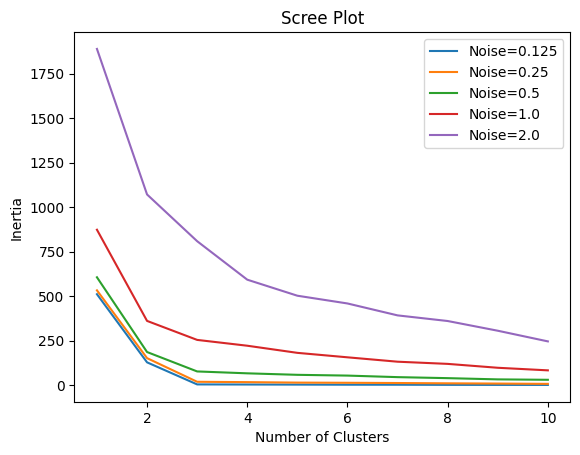

In [9]:
# PART 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to create scree plot
def scree_plot(df_list, labels):
    for df, label in zip(df_list, labels):
        inertia = []
        for k in range(1, 11):
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(df[['x1', 'x2']])
            inertia.append(kmeans.inertia_)
        plt.plot(range(1, 11), inertia, label=label)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()

# Create scree plots for each dataset in one plot
df_list = [df0_125, df0_25, df0_5, df1_0, df2_0]
labels = ['Noise=0.125', 'Noise=0.25', 'Noise=0.5', 'Noise=1.0', 'Noise=2.0']
scree_plot(df_list, labels)

> As the noise increases, our elbow get's less clear, with a less dramatic drop each increase. However, that is in proportion to the curve. From a an overall perspective, the higher noise have larger numerical decreases. The k values also look to be larger as the noise increases as well, as the elbow becomes less obvious.

> The elbow gives us valuable information about the optimal k. It's commonly seen in the point where the curve (rate of decreasing inertia) starts to level out. We see most of these values have an idea k of 3, while the example where noise = 2 is less obvoius. We could possibly say 4 here, or go for something higher assuming more significant value is present beyond 10.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [7]:
# PART 1
import pandas as pd

# load df
df = pd.read_csv('./data/2022 election cycle fundraising.csv')

# function to convert from dollars to number
def convertDollarsToInt(col):
    df[col] = (df[col].str.replace('$', '') # get rid of dollar sign
                .str.replace(',', '').astype(int)) # get rid of commas, convert to num

# call upon function for clean columns
convertDollarsToInt('Raised')
convertDollarsToInt('Spent')
convertDollarsToInt('Cash on Hand')
convertDollarsToInt('Debts')

df

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0
...,...,...,...,...,...,...,...,...,...
532,532,William Timmons,Republican,South Carolina,House,892064,823955,76799,391742
533,533,Young Kim,Republican,California,House,7900497,7380035,928803,94940
534,534,Yvette Clarke,Democratic,New York,House,684268,662375,93513,49480
535,535,Yvette Herrell,Republican,New Mexico,House,3777731,2746661,1085613,0


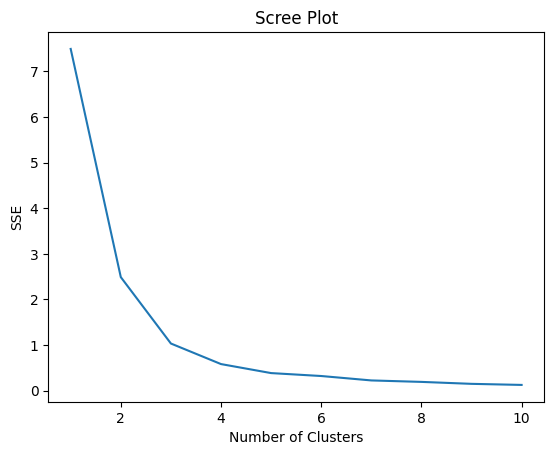

In [12]:
# PART 2
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# function to normalize and plot
def plotScree(col1, col2):
    # max-min normalization
    scaler = MinMaxScaler()
    df[[col1, col2]] = scaler.fit_transform(df[[col1, col2]])

    # make scree plot
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df[[col1, col2]])
        sse.append(kmeans.inertia_)
    plt.plot(range(1, 11), sse)
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Scree Plot')
    plt.show()

# call on raised and spent
plotScree('Raised', 'Spent')

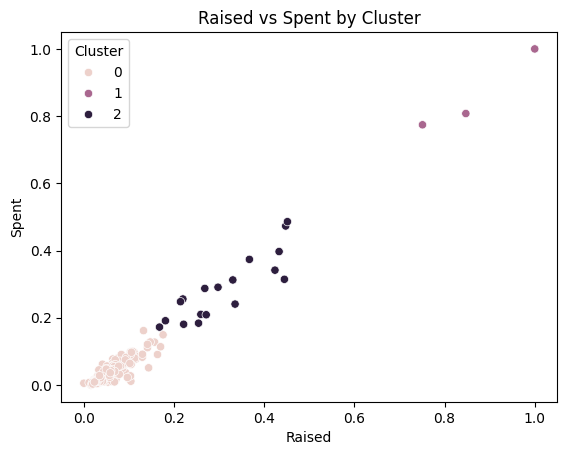

In [13]:
# function for a scatterplot
def makeScatterplot(k, col1, col2):
    # k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[[col1, col2]])
    df['Cluster'] = kmeans.labels_

    # make scatterplot
    sns.scatterplot(x=col1, y=col2, hue='Cluster', data=df)
    plt.title(f'{col1} vs {col2} by Cluster')
    plt.show()

# call function for raised and spent, k looks to be 3 based on scree
makeScatterplot(3, 'Raised', 'Spent')

In [16]:
# find politicians in the two smallest clusters
smallest_clusters = df[df['Cluster'].isin([1, 2])]
print(smallest_clusters[['Member', 'Cluster']])

                     Member  Cluster
2               Adam Schiff        2
87   Catherine Cortez Masto        2
89            Chuck Schumer        2
115            Dan Crenshaw        2
261            John Kennedy        2
290            Katie Porter        2
298          Kevin McCarthy        2
326           Maggie Hassan        2
328             Marco Rubio        2
340              Mark Kelly        1
357          Michael Bennet        2
390            Nancy Pelosi        2
402            Patty Murray        2
414               Rand Paul        2
417         Raphael Warnock        1
442             Ron Johnson        2
476           Steve Scalise        2
490                Ted Cruz        2
499                Tim Ryan        2
500               Tim Scott        2
523             Val Demings        1


> The smallest clusters are those with more raised and more spent. There seems to be a positive correlation here between the two variables. Based on my limited knowledge of poltiics, these inviduals seem to have had succesful races.

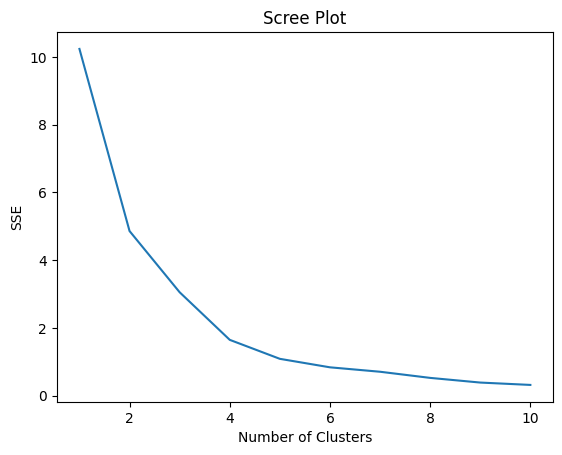

In [17]:
# PART 3

# call scree plot function for cash on hand and debts
plotScree('Cash on Hand', 'Debts')

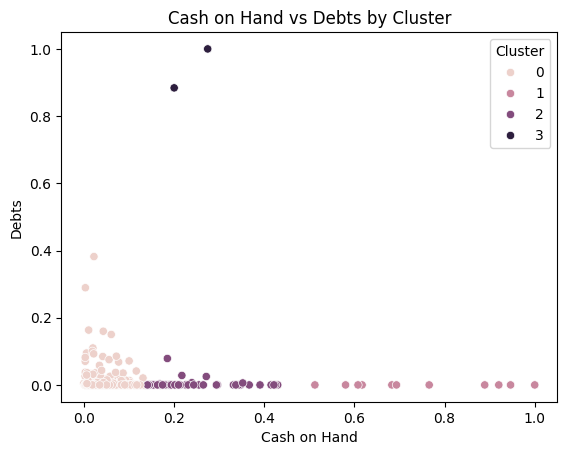

In [18]:
# call scatterplot function for these variables, k looks to be 4
makeScatterplot(4, 'Cash on Hand', 'Debts')

In [22]:
# find politicians in the two smallest clusters
smallest_clusters = df[df['Cluster'].isin([1, 3])]
print(smallest_clusters[['Member', 'Cluster']])

                  Member  Cluster
2            Adam Schiff        1
89         Chuck Schumer        1
133          David Trone        3
261         John Kennedy        1
267           John Thune        1
274      Josh Gottheimer        1
290         Katie Porter        1
310       Lindsey Graham        1
340           Mark Kelly        1
412  Raja Krishnamoorthi        1
417      Raphael Warnock        1
442          Ron Johnson        3
500            Tim Scott        1


> For these variables, it seems like there is a 'slight' negative correlation. The more cash you have, the less debt you have. Though most people don't have a debt, there are a handful of those in groups 0, 2, and 3 that have some.

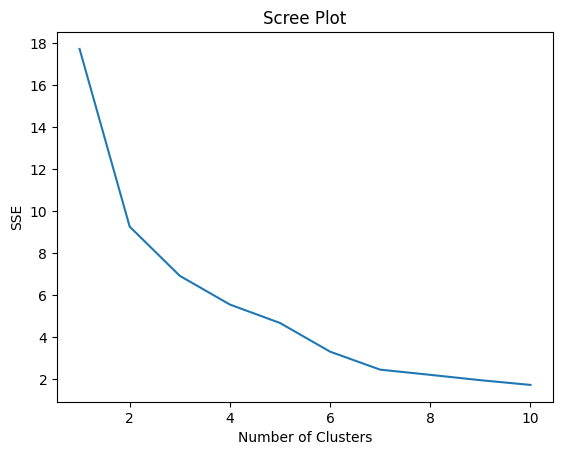

In [24]:
# PART 4

# columns for analysis
cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

# max-min normalization
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

# make scree plot
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[cols])
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Scree Plot')
plt.show()

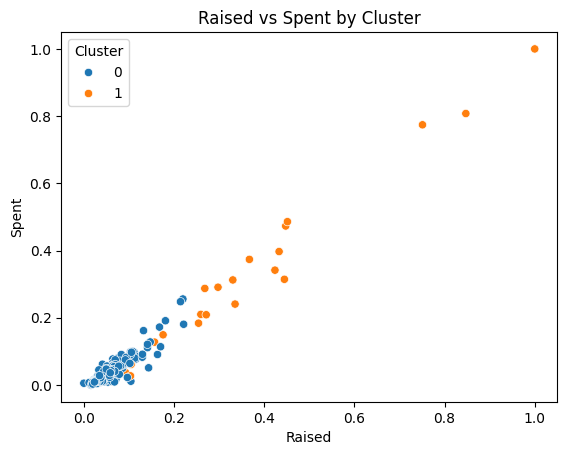

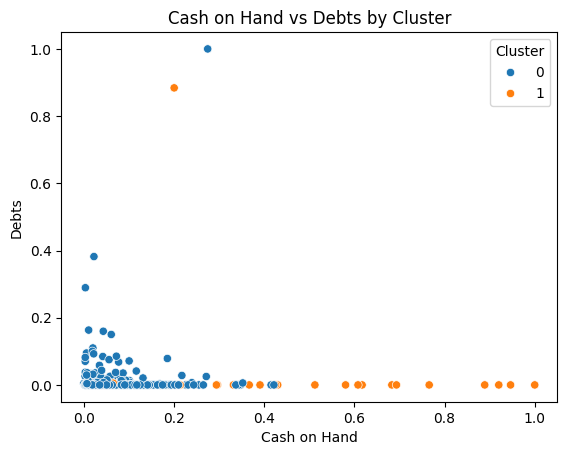

In [25]:
# call upon previous plots with new clustering to see if they're similar

k = 2 # based on scree plot

# k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[cols])
df['Cluster'] = kmeans.labels_

# updated function to make Scatterplot
def makeScatterplot(col1, col2):
    # make scatterplot
    sns.scatterplot(x=col1, y=col2, hue='Cluster', data=df)
    plt.title(f'{col1} vs {col2} by Cluster')
    plt.show()

makeScatterplot('Raised', 'Spent')
makeScatterplot('Cash on Hand', 'Debts')

> Despite the lower k value. The trends to be similar. Approximatley the same people that got grouped together in the original go-around got grouped together this time. The two smaller groups in raised vs spent joined together for the most part. For cash vs debts, the higher are still their own group, while most of the bottom stayed together. There are a few outliers in the second plot, but it's relatively showing similar trends.

> Based on the the findings above in tandem with my prior knowlege of politics, I found this exercise beneficial in further my perspective on campaigns and the funding within them.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?